# Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing


## Reading Data

In [3]:
# df = pd.read_csv(r'C:\Users\elaaf\Desktop\SDS\extra\BitcoinHeistData.csv')
df = pd.read_csv("/Users/muntaha/Documents/BitcoinHeistData.csv")

In [4]:
df.shape

(2916697, 10)

In [5]:
df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [6]:
len(df.address.unique()) #the address is not unique

2631095

## Correlation before processing the data

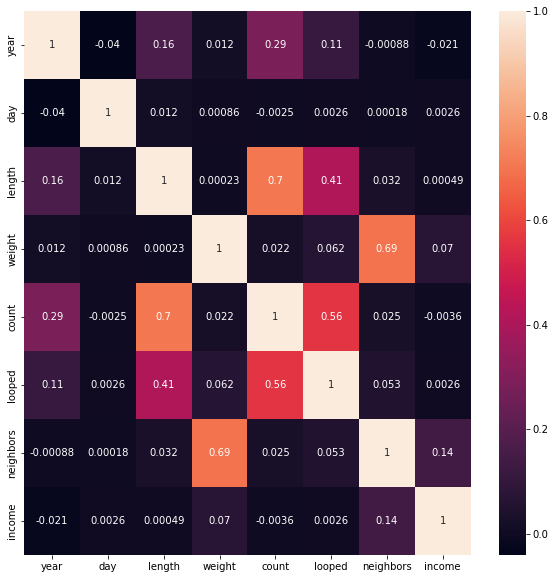

In [9]:
plt.figure(figsize=(10,10));
sns.heatmap(df.corr(), annot=True);

### Ransomware Distribution

In [7]:
to_plot = df.groupby(['label'])['address'].count().drop('white').sort_values(ascending=False)

In [8]:
to_plot

label
paduaCryptoWall                12390
montrealCryptoLocker            9315
princetonCerber                 9223
princetonLocky                  6625
montrealCryptXXX                2419
montrealNoobCrypt                483
montrealDMALockerv3              354
montrealDMALocker                251
montrealSamSam                    62
montrealGlobeImposter             55
montrealCryptoTorLocker2015       55
montrealGlobev3                   34
montrealGlobe                     32
montrealWannaCry                  28
montrealRazy                      13
montrealAPT                       11
paduaKeRanger                     10
montrealFlyper                     9
montrealXTPLocker                  8
montrealXLockerv5.0                7
montrealCryptConsole               7
montrealVenusLocker                7
montrealEDA2                       6
montrealJigSaw                     4
paduaJigsaw                        2
montrealSam                        1
montrealXLocker                 

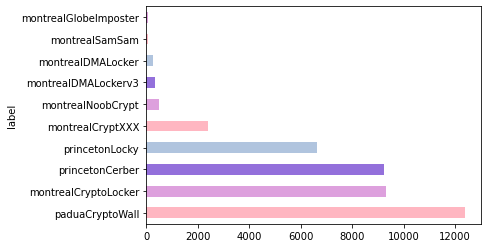

In [12]:
to_plot[:10].plot(kind='barh',color=['lightpink','plum', 'mediumpurple','lightsteelblue']);

### Changing labels to 0 and 1

In [9]:
unique_label = list(set(df.label))

In [10]:

d = {}

for i in unique_label:
    if i != 'white':
        d[i] = 1
    else:
        d[i] = 0


In [11]:
d

{'montrealXLocker': 1,
 'montrealNoobCrypt': 1,
 'white': 0,
 'paduaJigsaw': 1,
 'montrealCryptXXX': 1,
 'montrealSam': 1,
 'montrealComradeCircle': 1,
 'montrealEDA2': 1,
 'montrealGlobe': 1,
 'montrealGlobeImposter': 1,
 'montrealCryptConsole': 1,
 'montrealWannaCry': 1,
 'princetonCerber': 1,
 'montrealRazy': 1,
 'princetonLocky': 1,
 'montrealGlobev3': 1,
 'montrealCryptoLocker': 1,
 'paduaKeRanger': 1,
 'montrealSamSam': 1,
 'montrealAPT': 1,
 'montrealXTPLocker': 1,
 'montrealJigSaw': 1,
 'montrealDMALockerv3': 1,
 'paduaCryptoWall': 1,
 'montrealCryptoTorLocker2015': 1,
 'montrealFlyper': 1,
 'montrealDMALocker': 1,
 'montrealXLockerv5.0': 1,
 'montrealVenusLocker': 1}

In [12]:
df.label.replace(d, inplace=True)

<AxesSubplot:ylabel='address'>

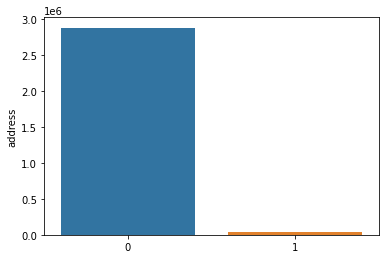

In [14]:
labels_dist = df.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist, x = [0,1])

In [15]:
labels_dist

label
0    2875284
1      41413
Name: address, dtype: int64

In [16]:
df.info(null_counts=True)

<ipython-input-16-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 222.5+ MB


C:\Users\elaaf\AppData\Local\Temp/ipykernel_21832/274559223.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


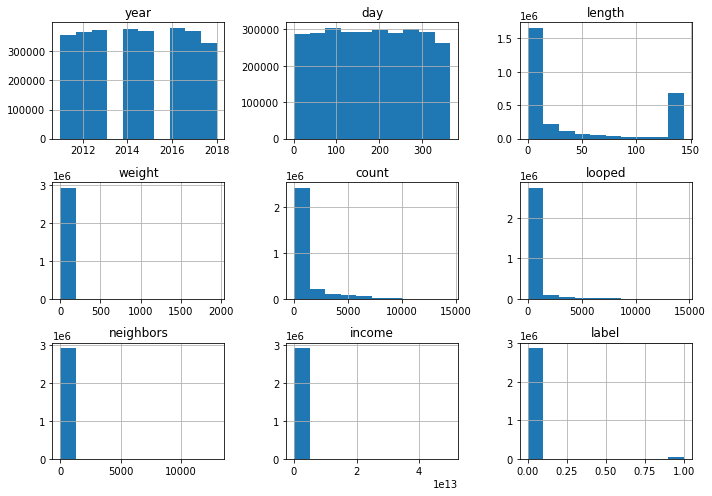

In [20]:
fig = plt.figure(figsize = (10,7));
ax = fig.gca();
df.hist(ax = ax);
plt.tight_layout();

## Handeling Unbalanced Data

#### 1. Random Down-Sampling

In [17]:
df_1 = df[(df['label']==1)]

In [18]:
df_1.shape

(41413, 10)

In [19]:
df_1.describe()

year           day        length        weight         count  \
count  41413.000000  41413.000000  41413.000000  4.141300e+04  41413.000000   
mean    2014.876923    174.439741     41.636926  6.274532e-01    599.810277   
std        1.361243     94.700239     58.442350  2.667625e+00   1419.955449   
min     2011.000000      1.000000      0.000000  4.719723e-42      1.000000   
25%     2014.000000     90.000000      0.000000  6.250000e-02      1.000000   
50%     2015.000000    160.000000      6.000000  3.880441e-01      1.000000   
75%     2016.000000    260.000000     80.000000  1.000000e+00     15.000000   
max     2018.000000    365.000000    144.000000  4.982885e+02  13462.000000   

             looped     neighbors        income    label  
count  41413.000000  41413.000000  4.141300e+04  41413.0  
mean      95.100645      2.076256  7.833721e+08      1.0  
std      525.423306      2.401167  1.423362e+10      0.0  
min        0.000000      1.000000  3.000000e+07      1.0  
25%        0.000000      1.000000  8.000000e+07      1.0  
50%        0.000000      2.000000  1.250000e+08      1.0  
75%        0.000000      2.000000  3.000000e+08      1.0  
max    11693.000000     94.000000  2.595000e+12      1.0

In [20]:
df_2 = df[(df['label']==0)].sample(n=41413, random_state=42)

In [21]:
df_2.shape

(41413, 10)

In [22]:
df_2.describe()

year           day        length        weight         count  \
count  41413.000000  41413.000000  41413.000000  4.141300e+04  41413.000000   
mean    2014.469080    182.330500     44.147538  5.861829e-01    717.606355   
std        2.270584    104.431949     58.681944  9.423326e+00   1698.990105   
min     2011.000000      1.000000      0.000000  6.493017e-80      1.000000   
25%     2012.000000     92.000000      2.000000  2.371412e-02      1.000000   
50%     2014.000000    183.000000      8.000000  2.500000e-01      1.000000   
75%     2016.000000    272.000000     98.000000  9.062500e-01     53.000000   
max     2018.000000    365.000000    144.000000  1.866717e+03  14494.000000   

             looped     neighbors        income    label  
count  41413.000000  41413.000000  4.141300e+04  41413.0  
mean     240.033275      2.414121  3.816353e+09      0.0  
std      966.557317     58.450442  7.154849e+10      0.0  
min        0.000000      1.000000  3.000000e+07      0.0  
25%        0.000000      1.000000  7.466611e+07      0.0  
50%        0.000000      2.000000  2.000000e+08      0.0  
75%        0.000000      2.000000  1.000000e+09      0.0  
max    13833.000000  11746.000000  1.067816e+13      0.0

In [23]:
df_new = pd.concat([df_1, df_2])

<AxesSubplot:ylabel='address'>

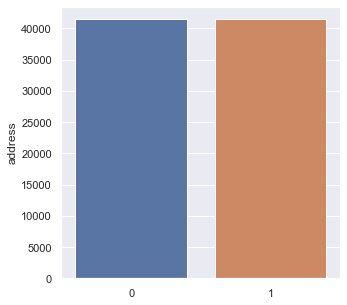

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
labels_dist_ = df_new.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist_, x = [0,1])

In [29]:
# sns.pairplot(df_new, hue='label');

In [30]:
#sns.pairplot(df_new);

C:\Users\elaaf\AppData\Local\Temp/ipykernel_21832/3678586302.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_new.hist(ax = ax);


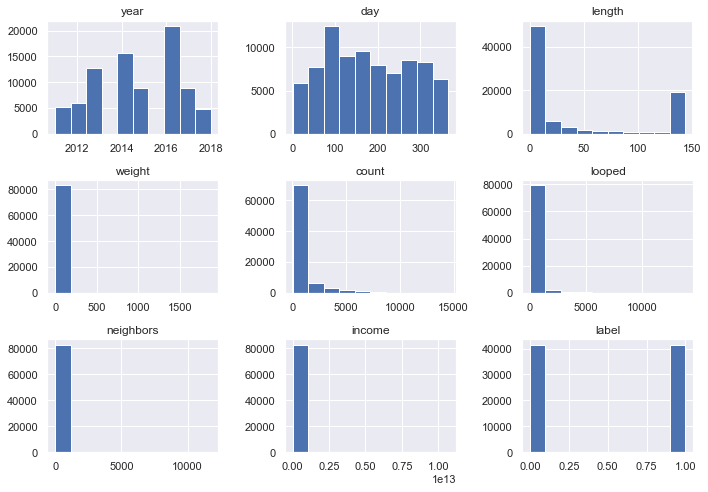

In [31]:
fig = plt.figure(figsize = (10,7));
ax = fig.gca();
df_new.hist(ax = ax);
plt.tight_layout();

In [32]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df_new.corr(), annot=True);

In [ ]:
## TODO: save model
#df_new.to_csv(r'C:\Users\elaaf\Desktop\SDS\Project_3\Data\BMT_balanced.csv')

#### 2. SMOTE

#### 3. Others (todo)

## Power Transformer

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [37]:
data =df_new.drop(columns=['label','address', 'day', 'year','income'])
pt.fit(data)
print(pt.lambdas_)

[-0.06131344 -1.44010372 -0.43726334 -1.49824754 -1.27857407]


In [38]:
data.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors'], dtype='object')

In [39]:
data

length    weight  count  looped  neighbors
0            18  0.008333      1       0          2
1            44  0.000244      1       0          1
2             0  1.000000      1       0          2
3            72  0.003906      1       0          2
4           144  0.072848    456       0          1
...         ...       ...    ...     ...        ...
2724847       0  1.000000      1       0          1
1994617       2  0.250000      1       0          2
635147      136  0.125000   1325    1325          1
350738        4  0.125000      1       0          2
2643493     144  0.556024   1277       0          2

[82826 rows x 5 columns]

In [40]:
pt.transform(data)

array([[ 0.35541503, -1.20076717, -0.73865169, -0.37207183,  0.49038607],
       [ 0.7865231 , -1.24397533, -0.73865169, -0.37207183, -1.25551146],
       [-1.30107939,  1.12137531, -0.73865169, -0.37207183,  0.49038607],
       ...,
       [ 1.31050585, -0.66056103,  1.6259094 ,  2.90475041, -1.25551146],
       [-0.35870715, -0.66056103, -0.73865169, -0.37207183,  0.49038607],
       [ 1.3362704 ,  0.51988849,  1.62352676, -0.37207183,  0.49038607]])

In [41]:
test = pd.DataFrame(pt.transform(data), columns=['length_t', 'weight_t', 'count_t', 'looped_t', 'neighbors_t'])

In [42]:
test.describe()

length_t      weight_t       count_t      looped_t   neighbors_t
count  8.282600e+04  8.282600e+04  8.282600e+04  8.282600e+04  8.282600e+04
mean   7.905792e-15 -9.218540e-15  2.651370e-15 -2.284460e-14  1.087523e-14
std    1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00
min   -1.301079e+00 -1.245293e+00 -7.386517e-01 -3.720718e-01 -1.255511e+00
25%   -6.477988e-01 -1.060596e+00 -7.386517e-01 -3.720718e-01 -1.255511e+00
50%   -3.707359e-02 -2.491646e-02 -7.386517e-01 -3.720718e-01  4.903861e-01
75%    1.122097e+00  1.121375e+00  1.087352e+00 -3.720718e-01  4.903861e-01
max    1.336270e+00  2.502569e+00  1.720990e+00  2.904817e+00  3.060208e+00

In [43]:
df_new.hist();

In [44]:
df.income.min()

30000000.0

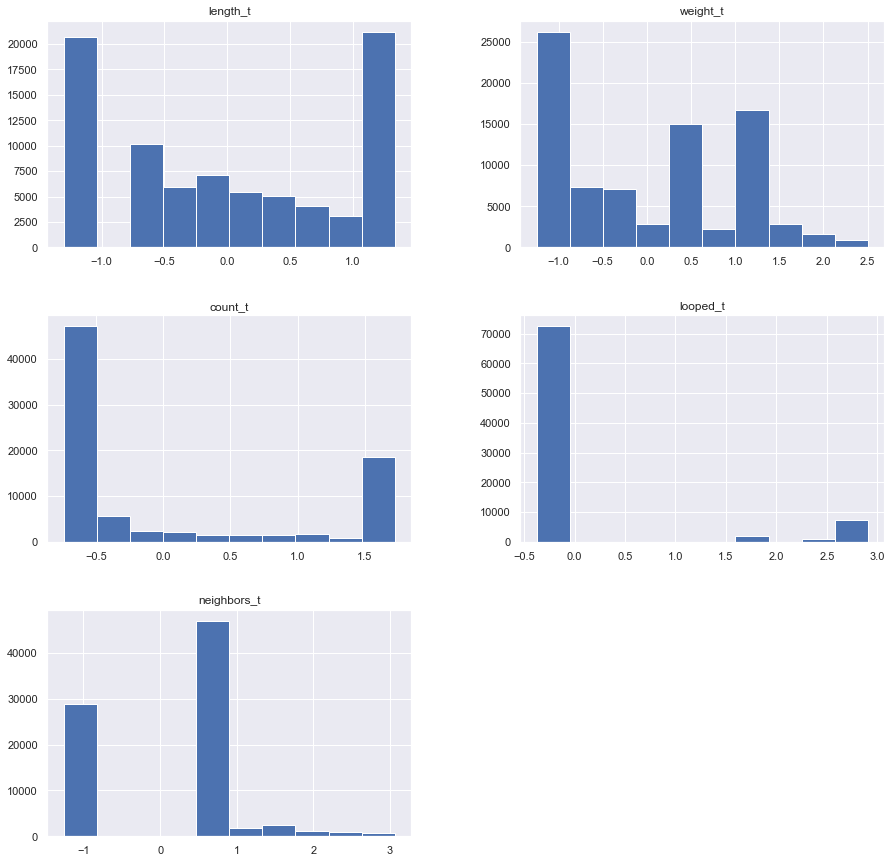

In [45]:
test.hist();

In [46]:
df_new.shape

(82826, 10)

In [47]:
test.shape

(82826, 5)

In [48]:
df_transformed = pd.concat([df_new.reset_index().drop(columns='index'), test.reset_index().drop(columns='index')], axis=1)

In [49]:
pt = PowerTransformer(method='box-cox')
income = np.array(df_transformed['income']).reshape(-1, 1)
pt.fit(income)
income_t = pt.transform(income)

In [50]:
df_transformed['income_t'] = income_t

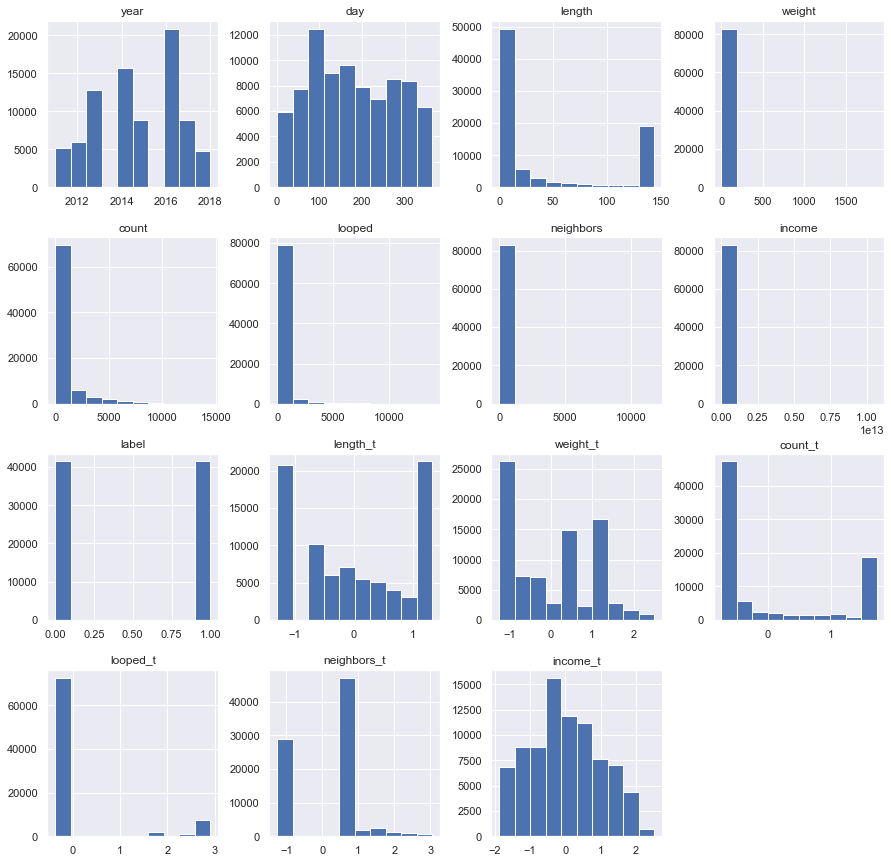

In [51]:
df_transformed.hist();

## Encoding the address

In [55]:
df_Temp = df.copy(deep=True)

In [56]:
#change address to numerical (preprocessing.LabelEncoder())
label_encoder = preprocessing.LabelEncoder()
df_Temp['address']=label_encoder.fit_transform(df_Temp['address'])
df_Temp.head()

address  year  day  length    weight  count  looped  neighbors  \
0       23  2017   11      18  0.008333      1       0          2   
1      128  2016  132      44  0.000244      1       0          1   
2      169  2016  246       0  1.000000      1       0          2   
3      217  2016  322      72  0.003906      1       0          2   
4      293  2016  238     144  0.072848    456       0          1   

        income  label  
0  100050000.0      1  
1  100000000.0      1  
2  200000000.0      1  
3   71200000.0      1  
4  200000000.0      1

In [57]:
label_encoder = preprocessing.LabelEncoder()
df_transformed['address']=label_encoder.fit_transform(df_transformed['address'])
df_transformed.head()

address  year  day  length    weight  count  looped  neighbors  \
0        0  2017   11      18  0.008333      1       0          2   
1        5  2016  132      44  0.000244      1       0          1   
2        6  2016  246       0  1.000000      1       0          2   
3        8  2016  322      72  0.003906      1       0          2   
4        9  2016  238     144  0.072848    456       0          1   

        income  label  length_t  weight_t   count_t  looped_t  neighbors_t  \
0  100050000.0      1  0.355415 -1.200767 -0.738652 -0.372072     0.490386   
1  100000000.0      1  0.786523 -1.243975 -0.738652 -0.372072    -1.255511   
2  200000000.0      1 -1.301079  1.121375 -0.738652 -0.372072     0.490386   
3   71200000.0      1  1.018622 -1.224309 -0.738652 -0.372072     0.490386   
4  200000000.0      1  1.336270 -0.884346  1.538937 -0.372072    -1.255511   

   income_t  
0 -0.473005  
1 -0.473482  
2  0.122397  
3 -0.815763  
4  0.122397

In [27]:
label_encoder = preprocessing.LabelEncoder()
df_new['address']=label_encoder.fit_transform(df_new['address'])
df_new.head()

address  year  day  length    weight  count  looped  neighbors  \
0        0  2017   11      18  0.008333      1       0          2   
1        5  2016  132      44  0.000244      1       0          1   
2        6  2016  246       0  1.000000      1       0          2   
3        8  2016  322      72  0.003906      1       0          2   
4        9  2016  238     144  0.072848    456       0          1   

        income  label  
0  100050000.0      1  
1  100000000.0      1  
2  200000000.0      1  
3   71200000.0      1  
4  200000000.0      1

In [59]:
df_transformed.to_csv(r'C:\Users\elaaf\Desktop\SDS\Project_3\Data\BMT_balanced_encoded_address.csv')

# Different Scales

### RobustScaler

In [28]:
test = df_new.copy(deep = True)

In [29]:
test

address  year  day  length    weight  count  looped  neighbors  \
0              0  2017   11      18  0.008333      1       0          2   
1              5  2016  132      44  0.000244      1       0          1   
2              6  2016  246       0  1.000000      1       0          2   
3              8  2016  322      72  0.003906      1       0          2   
4              9  2016  238     144  0.072848    456       0          1   
...          ...   ...  ...     ...       ...    ...     ...        ...   
2724847     5214  2018  139       0  1.000000      1       0          1   
1994617    20804  2016  138       2  0.250000      1       0          2   
635147     21980  2012  239     136  0.125000   1325    1325          1   
350738     46995  2011  320       4  0.125000      1       0          2   
2643493    36051  2018   57     144  0.556024   1277       0          2   

               income  label  
0        1.000500e+08      1  
1        1.000000e+08      1  
2        2.000000e+08      1  
3        7.120000e+07      1  
4        2.000000e+08      1  
...               ...    ...  
2724847  1.560892e+08      0  
1994617  5.149800e+08      0  
635147   7.580280e+07      0  
350738   5.303868e+09      0  
2643493  3.761527e+08      0  

[82826 rows x 10 columns]

In [32]:

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

scale_columns = ['length','weight','count','income']

test['s_length'] = rob_scaler.fit_transform(test['length'].values.reshape(-1,1))
test['s_weight'] = rob_scaler.fit_transform(test['weight'].values.reshape(-1,1))
test['s_counted'] = rob_scaler.fit_transform(test['count'].values.reshape(-1,1))

test['s_income'] = rob_scaler.fit_transform(test['income'].values.reshape(-1,1))

test.drop(scale_columns,axis=1,inplace=True)

# test['s_looped'] = rob_scaler.fit_transform(test['looped'].values.reshape(-1,1))
# test['s_neighbors'] = rob_scaler.fit_transform(test['neighbors'].values.reshape(-1,1))

# test.drop(['looped','neighbors'],axis=1,inplace=True)

test.head()

address  year  day  looped  neighbors  label  s_length  s_weight  \
0        0  2017   11       0          2      1  0.113636 -0.317644   
1        5  2016  132       0          1      1  0.409091 -0.326033   
2        6  2016  246       0          2      1 -0.090909  0.710751   
3        8  2016  322       0          2      1  0.727273 -0.322235   
4        9  2016  238       0          1      1  1.545455 -0.250739   

   s_counted  s_income  
0   0.000000 -0.139136  
1   0.000000 -0.139255  
2   0.000000  0.098840  
3   0.000000 -0.207826  
4  12.297297  0.098840

In [34]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

test['s_looped'] = std_scaler.fit_transform(test['looped'].values.reshape(-1,1))
test['s_neighbors'] = std_scaler.fit_transform(test['neighbors'].values.reshape(-1,1))

test.drop(['looped','neighbors'],axis=1,inplace=True)

In [35]:
test

address  year  day  label  s_length  s_weight  s_counted   s_income  \
0              0  2017   11      1  0.113636 -0.317644   0.000000  -0.139136   
1              5  2016  132      1  0.409091 -0.326033   0.000000  -0.139255   
2              6  2016  246      1 -0.090909  0.710751   0.000000   0.098840   
3              8  2016  322      1  0.727273 -0.322235   0.000000  -0.207826   
4              9  2016  238      1  1.545455 -0.250739  12.297297   0.098840   
...          ...   ...  ...    ...       ...       ...        ...        ...   
2724847     5214  2018  139      0 -0.090909  0.710751   0.000000  -0.005709   
1994617    20804  2016  138      0 -0.068182 -0.067027   0.000000   0.848793   
635147     21980  2012  239      0  1.454545 -0.196656  35.783784  -0.196867   
350738     46995  2011  320      0 -0.045455 -0.196656   0.000000  12.250906   
2643493    36051  2018   57      0  1.545455  0.250331  34.486486   0.518251   

         s_looped  s_neighbors  
0       -0.214479    -0.005927  
1       -0.214479    -0.030102  
2       -0.214479    -0.005927  
3       -0.214479    -0.005927  
4       -0.214479    -0.030102  
...           ...          ...  
2724847 -0.214479    -0.030102  
1994617 -0.214479    -0.005927  
635147   1.481470    -0.030102  
350738  -0.214479    -0.005927  
2643493 -0.214479    -0.005927  

[82826 rows x 10 columns]

In [40]:
test.to_csv("/Users/muntaha/Documents/Ransomware-Transactions-Detection/Data/BMT_balanced_encoded_address_RobustScaler_Test.csv")